In [1]:
using Plots
using LaTeXStrings

LoadError: ArgumentError: Package LaTeXStrings not found in current path.
- Run `import Pkg; Pkg.add("LaTeXStrings")` to install the LaTeXStrings package.

# Modelo de Hodking Huxley

Elaborado por: Hernández García Viridiana

El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:
\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

Se implemento el siguiente programa para la función $\alpha_n$ como función del voltaje V definiendo un caso especial cuando V - 10 < epsilon.

Para ello verificamos como se comporta la función en esta vecindad para elegir un valor de epsilon adecuado

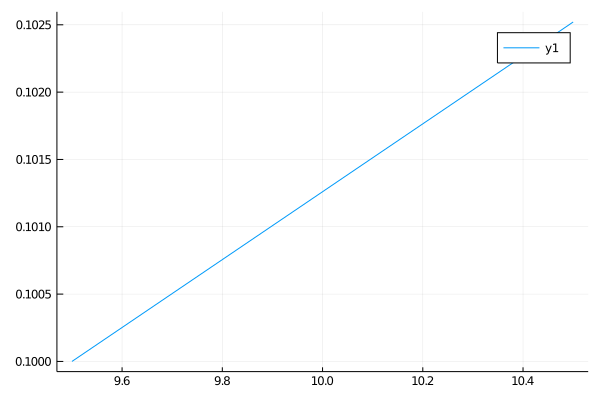

In [2]:
function alpha_n(V)
    
    # Valor de epsilon para el caso especial cuando V - 10 < epsilon
    epsilon = 1e-10 

    if V - 10 < epsilon
        # Valor de referencia cuando V tiende a 10
        return 0.1  
    else
        return (0.01 * (10 - V)) / (exp((10 - V) / 10) - 1)
    end
end


# Grafica la función alpha_n(V) en la vecindad de V = 10 para verificar su comportamiento
plot(alpha_n, 9.5:10.5)

Ademas, se implemento un programa para las funciones como función del voltaje V, para la compuerta de K para generar
una gráfica de $\alpha_n$ y $\beta_n$

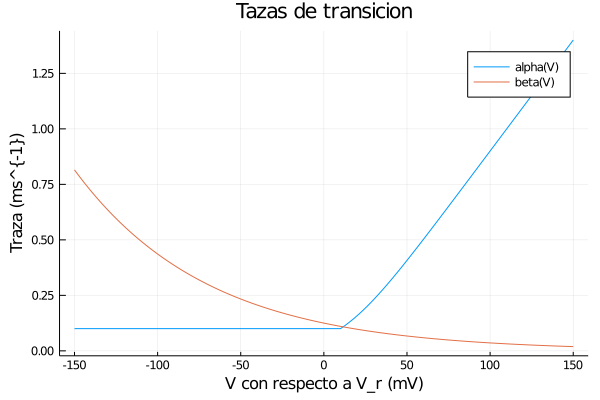

In [3]:
# La función beta_n(V) calcula el valor de beta_n para un voltaje V
function beta_n(V)
    e = Base.MathConstants.e
    0.125 * exp(-V / 80)
end

# La función plotAlpha() genera una gráfica que muestra las tasas de transición alpha_n(V) y beta_n(V) 
# en función del voltaje V con respecto al voltaje de reposo V_r
function plotAlpha()
    V = -150:150
    alpha = broadcast(alpha_n, V)
    beta = broadcast(beta_n, V)
    plot(
        V,
        alpha,
        title="Tazas de transicion",
        xlabel="V con respecto a V_r (mV)",
        ylabel="Traza (ms^{-1})",
        label="alpha(V)"
    )
    plot!(V, beta, label="beta(V)")
end

plotAlpha()

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

Dadas alfa y beta, se implementa lo siguiente para calcular y graficar n y tau para ambos canales, se agrega las funciones correspondientes para la compuerta de sodio también,
y se deduce sus definiciones a partir de las llamadas en la función para graficar

In [4]:
import Pkg
Pkg.add("Plots")

    Updating registry at `C:\Users\Asus\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Asus\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Asus\.julia\environments\v1.8\Manifest.toml`


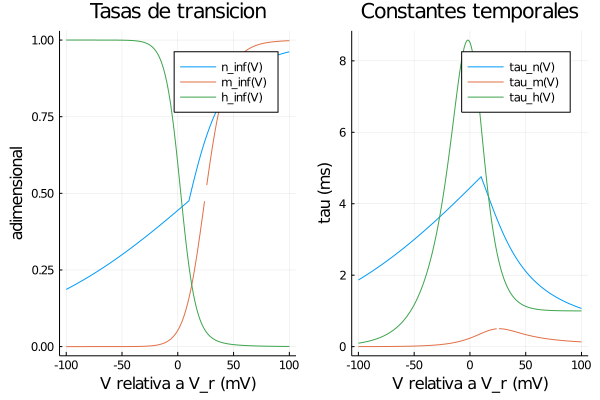

In [5]:
using Plots

# Definición de las funciones de las compuertas de K
function alpha_n(V)
    # Función de transición alpha para la compuerta de K
    if V - 10 < 1e-10
        0.1 # Valor límite cuando V se acerca a 10
    else
        0.01 * (10 - V) / (exp((10 - V) / 10) - 1)
    end
end

function beta_n(V)
    # Función de transición beta para la compuerta de K
    0.125 * exp(-V / 80)
end

function plotAlpha()
    # Gráfica de las funciones alpha_n y beta_n
    V = collect(-150:150)
    alpha = broadcast(alpha_n, V)
    beta = broadcast(beta_n, V)
    plot(
        V,
        alpha,
        title="Tasas de transición",
        xlabel="V con respecto a V_r (mV)",
        ylabel="tasa (ms^-1)",
        label="alpha(V)"
    )
    plot!(V, beta, label="beta(V)")
end

plotAlpha()

# Definición de las funciones de las compuertas de Na
function alpha_m(V)
    # Función de transición alpha para la compuerta de Na
    0.1 * (25 .- V) ./ (exp.((25 .- V) ./ 10) .- 1)
end

function beta_m(V)
    # Función de transición beta para la compuerta de Na
    4 * exp.(-V ./ 18)
end

function alpha_h(V)
    # Función de transición alpha para la compuerta de Na
    0.07 * exp.(-V ./ 20)
end

function beta_h(V)
    # Función de transición beta para la compuerta de Na
    1 ./ (exp.((30 .- V) ./ 10) .+ 1)
end

function tau_inf(alpha, beta)
    # Cálculo del tiempo constante a partir de las tasas de transición
    1 ./ (alpha .+ beta)
end

function n_inf(alpha, beta)
    # Cálculo de la variable adimensional a partir de las tasas de transición
    alpha ./ (alpha .+ beta)
end

function plotParameters()
    # Gráfica de las variables n_inf, tau_inf para las compuertas de K y Na
    V = -100:100
    
    n_inf_n = n_inf(alpha_n.(V), beta_n.(V))
    tau_inf_n = tau_inf(alpha_n.(V), beta_n.(V))
    
    n_inf_m = n_inf(alpha_m.(V), beta_m.(V))
    tau_inf_m = tau_inf(alpha_m.(V), beta_m.(V))
    
    n_inf_h = n_inf(alpha_h.(V), beta_h.(V))
    tau_inf_h = tau_inf(alpha_h.(V), beta_h.(V))
    
    p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        label=["n_inf(V)" "m_inf(V)" "h_inf(V)"]
    )
    
    p2 = plot(
        V,
        [tau_inf_n, tau_inf_m, tau_inf_h],
        label=["tau_n(V)" "tau_m(V)" "tau_h(V)"]
    )
    
    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tasas de transicion" "Constantes temporales"],
        xlabel="V relativa a V_r (mV)",
        ylabel=["adimensional" "tau (ms)"],
        legend=true
    )
end

plotParameters()

Las funciones $\alpha_m$(V), $\beta_m$(V), $\alpha_h$(V), y $\beta_h$(V) calculan las tasas de transición correspondientes a las compuertas de sodio en función del voltaje V con respecto al voltaje de reposo $V_r$. 

Las funciones $\tau_{inf}$($\alpha$, $\beta$) y $n_{inf}$($\alpha$, $\beta$) calculan el tiempo constante y la variable adimensional de las compuertas, respectivamente.

La función  `plotParameters()` genera una gráfica que muestra las variables $n_{inf}$(V), $m_{inf}$(V), $h_{inf}$(V) (las compuertas en estado estacionario) y las variables $\tau_n$(V), $\tau_m$(V), $\tau_h$(V) (los tiempos constantes) en función del voltaje V con respecto al voltaje de reposo $V_r$. 

La gráfica tiene dos subfiguras, una para las tasas de transición y otra para los tiempos constantes.

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}


Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:
\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para realizar la simulación utilizando el método de Euler, necesitamos definir las ecuaciones diferenciales que describen la dinámica de los canales iónicos y el potencial de membrana.

Usaremos las siguientes ecuaciones:

\begin{align}
\frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
\frac{dm}{dt} &= \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
\frac{dh}{dt} &= \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
\frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V - E_{Na}) - \frac{G_K}{C_m}(V - E_K) - \frac{g_L}{C_m}(V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Donde:
- $n^{\infty}(V)$, $m^{\infty}(V)$ y $h^{\infty}(V)$ son las funciones de las variables de compuerta ($n$, $m$ y $h$) en función del potencial de membrana $V$.
- $\tau_n(V)$, $\tau_m(V)$ y $\tau_h(V)$ son las constantes temporales en función del potencial de membrana $V$.
- $G_{Na}$ y $G_K$ son las conductancias de los canales de sodio y potasio respectivamente.
- $g_L$ es la conductancia de fuga.
- $E_{Na}$, $E_K$ y $E_L$ son los potenciales de equilibrio para los canales de sodio, potasio y la fuga respectivamente.
- $C_m$ es la capacitancia de la membrana.
- $I_{ext}$ es la corriente externa aplicada.

Dado un conjunto de valores iniciales $(n_0, m_0, h_0, V_0)$, podemos iterar el método de Euler para aproximar las soluciones en intervalos de tiempo $\Delta t$:

\begin{align}
n(t + \Delta t) &= n(t) + \Delta t \left(\frac{n^{\infty}(V)}{\tau_n(V)} - \frac{n(t)}{\tau_n(V)}\right) \\
m(t + \Delta t) &= m(t) + \Delta t \left(\frac{m^{\infty}(V)}{\tau_m(V)} - \frac{m(t)}{\tau_m(V)}\right) \\
h(t + \Delta t) &= h(t) + \Delta t \left(\frac{h^{\infty}(V)}{\tau_h(V)} - \frac{h(t)}{\tau_h(V)}\right) \\
V(t + \Delta t) &= V(t) + \Delta t \left(-\frac{G_{Na}}{C_m}(V - E_{Na}) - \frac{G_K}{C_m}(V - E_K) - \frac{g_L}{C_m}(V - E_L) + \frac{1}{C_m}I_{ext}\right)
\end{align}

A continuación, vamos a realizar la simulación con los valores por defecto y generar las gráficas correspondientes para el voltaje de membrana, la conductancia de los canales, las tasas de transición y las constantes temporales.

In [6]:
function EulerHodkinHuxley(parametros)
    # Desempaqueta los parámetros
    DeltaT = parametros["DeltaT"]  # Tamaño del paso de tiempo
    maxT = parametros["maxT"]  # Tiempo máximo de simulación
    V0 = parametros["V0"]  # Potencial de membrana inicial
    gNa = parametros["gNa"]  # Conductancia de sodio máxima
    gK = parametros["gK"]  # Conductancia de potasio máxima
    gL = parametros["gL"]  # Conductancia de fugas máxima
    Cm = parametros["Cm"]  # Capacitancia de la membrana
    ENa = parametros["ENa"]  # Potencial de sodio
    EK = parametros["EK"]  # Potencial de potasio
    EL = parametros["EL"]  # Potencial de fugas

    # Inicializa los vectores de tiempo y variables
    T = collect(0:DeltaT:maxT)  # Vector de tiempo
    n = zeros(length(T))  # Variable de activación de canales de potasio
    m = zeros(length(T))  # Variable de activación de canales de sodio
    h = zeros(length(T))  # Variable de desactivación de canales de sodio
    V = zeros(length(T))  # Potencial de membrana

    # Establece las condiciones iniciales
    n[1] = n_inf(V0)  # Valor inicial de n
    m[1] = m_inf(V0)  # Valor inicial de m
    h[1] = h_inf(V0)  # Valor inicial de h
    V[1] = V0  # Valor inicial de V

    # Calcula las soluciones iterativamente utilizando el método de Euler
    for i in 2:length(T)
        # Calcula las conductancias y corrientes en el paso de tiempo anterior
        GNa = gNa * m[i-1]^3 * h[i-1]  # Conductancia de sodio
        GK = gK * n[i-1]^4  # Conductancia de potasio
        IL = gL * (V[i-1] - EL)  # Corriente de fugas
        INa = GNa * (V[i-1] - ENa)  # Corriente de sodio
        IK = GK * (V[i-1] - EK)  # Corriente de potasio

        # Calcula la corriente externa en el tiempo actual
        Iext = makeIext(T[i])

        # Calcula la derivada del potencial de membrana
        dV = (-INa - IK - IL + Iext) / Cm

        # Actualiza las variables utilizando el método de Euler
        n[i] = n[i-1] + DeltaT * (n_inf(V[i-1]) - n[i-1]) / tau_n(V[i-1])  # Actualiza n
        m[i] = m[i-1] + DeltaT * (m_inf(V[i-1]) - m[i-1]) / tau_m(V[i-1])  # Actualiza m
        h[i] = h[i-1] + DeltaT * (h_inf(V[i-1]) - h[i-1]) / tau_h(V[i-1])  # Actualiza h
        V[i] = V[i-1] + DeltaT * dV  # Actualiza el potencial de membrana
    end

    # Devuelve los resultados y se guardan en un diccionario
    return Dict(
        "T" => T,  # Vector de tiempo
        "V" => V,  # Potencial de membrana
        "n" => n,  # Variable de activación de canales de potasio
        "m" => m,  # Variable de activación de canales de sodio
        "h" => h,  # Variable de desactivación de canales de sodio
        "GK" => gK * n.^4,  # Conductancia de potasio
        "GNa" => gNa * m.^3 .* h,  # Conductancia de sodio
        "tauN" => tau_n.(V),  # Constante de tiempo de n
        "tauM" => tau_m.(V),  # Constante de tiempo de m
        "tauH" => tau_h.(V)  # Constante de tiempo de h
    )
end

EulerHodkinHuxley (generic function with 1 method)

Como descripción el código realiza los siguientes pasos:

-Primero desempaqueta los parámetros necesarios para la simulación, como el tamaño del paso de tiempo, el tiempo máximo de simulación y los valores iniciales de los parámetros del modelo.

-Luego, inicializa los vectores de tiempo y variables para almacenar los resultados de la simulación.

-Establece las condiciones iniciales de las variables del modelo, como las variables de activación de los canales iónicos y el potencial de membrana.

-Utiliza el método de Euler para iterativamente calcular las soluciones del modelo en cada paso de tiempo. Esto implica calcular las conductancias y corrientes en el paso de tiempo anterior, calcular la corriente externa en el tiempo actual, y actualizar las variables y el potencial de membrana utilizando las ecuaciones del modelo de Hodgkin-Huxley.

-Al final, almacena los resultados en un diccionario y los devuelve al final de la simulación.


In [7]:
# Definición de las funciones que describen el modelo de Hodgkin-Huxley
function n_inf(V)
    # Calcula la variable de activación de canales de potasio
    alpha_n = (0.01*(V+55)) / (1 - exp(-0.1*(V+55)))
    beta_n = 0.125 * exp(-0.0125*(V+65))
    return alpha_n / (alpha_n + beta_n)
end

function m_inf(V)
    # Calcula la variable de activación de canales de sodio
    alpha_m = (0.1*(V+40)) / (1 - exp(-0.1*(V+40)))
    beta_m = 4.0 * exp(-0.0556*(V+65))
    return alpha_m / (alpha_m + beta_m)
end

function h_inf(V)
    # Calcula la variable de desactivación de canales de sodio
    alpha_h = 0.07 * exp(-0.05*(V+65))
    beta_h = 1 / (1 + exp(-0.1*(V+35)))
    return alpha_h / (alpha_h + beta_h)
end

function tau_n(V)
    # Calcula la constante de tiempo de la variable de activación de canales de potasio
    alpha_n = (0.01*(V+55)) / (1 - exp(-0.1*(V+55)))
    beta_n = 0.125 * exp(-0.0125*(V+65))
    return 1 / (alpha_n + beta_n)
end

function tau_m(V)
    # Calcula la constante de tiempo de la variable de activación de canales de sodio
    alpha_m = (0.1*(V+40)) / (1 - exp(-0.1*(V+40)))
    beta_m = 4.0 * exp(-0.0556*(V+65))
    return 1 / (alpha_m + beta_m)
end

function tau_h(V)
    # Calcula la constante de tiempo de la variable de desactivación de canales de sodio
    alpha_h = 0.07 * exp(-0.05*(V+65))
    beta_h = 1 / (1 + exp(-0.1*(V+35)))
    return 1 / (alpha_h + beta_h)
end

function makeIext(t0=10.0, tfin=16.0, current=6.5)
    # Genera una función que representa una corriente externa rectangular en un intervalo de tiempo
    function Iext(t)
        if t > t0 && t < tfin
            return current
        else
            return 0.0
        end
    end
    return Iext
end

# Implementación de la funcion para el modelo de Hodgkin-Huxley
function EulerHodkinHuxley(parametros)

    Δt = parametros["DeltaT"]
    maxT = parametros["maxT"]
    V0 = parametros["V0"]
    gNa = parametros["gNa"]
    gK = parametros["gK"]
    gL = parametros["gL"]
    Cm = parametros["Cm"]
    ENa = parametros["ENa"]
    EK = parametros["EK"]
    EL = parametros["EL"]
    
    # Inicialización de variables
    t = 0.0
    V = V0
    n = n_inf(V)
    m = m_inf(V)
    h = h_inf(V)
    
    # Vectores para almacenar los resultados
    T = [t]
    V_values = [V]
    n_values = [n]
    m_values = [m]
    h_values = [h]
    GK_values = [gK * n^4]
    GNa_values = [gNa * m^3 * h]
    tauN_values = [tau_n(V)]
    tauM_values = [tau_m(V)]
    tauH_values = [tau_h(V)]
    
    while t < maxT
        # Cálculo de corriente externa en el tiempo t
        Iext = makeIext()(t)
        
        # Cálculo de los valores de n, m y h en t+Δt
        n_new = (1 - Δt/tau_n(V)) * n + (Δt/tau_n(V)) * n_inf(V)
        m_new = (1 - Δt/tau_m(V)) * m + (Δt/tau_m(V)) * m_inf(V)
        h_new = (1 - Δt/tau_h(V)) * h + (Δt/tau_h(V)) * h_inf(V)
        
        # Cálculo de V en t+Δt
        GNa = gNa * m^3 * h
        GK = gK * n^4
        VL = gL * (V - EL)
        V_new = V - Δt/Cm * (GNa * (V - ENa) + GK * (V - EK) + VL) + Δt/Cm * Iext
        
        # Actualización de variables y tiempo
        t += Δt
        V = V_new
        n = n_new
        m = m_new
        h = h_new
        
        # Almacenamiento de los valores
        push!(T, t)
        push!(V_values, V)
        push!(n_values, n)
        push!(m_values, m)
        push!(h_values, h)
        push!(GK_values, GK)
        push!(GNa_values, GNa)
        push!(tauN_values, tau_n(V))
        push!(tauM_values, tau_m(V))
        push!(tauH_values, tau_h(V))
    end
    
    return (T=T, V=V_values, n=n_values, m=m_values, h=h_values,
            GK=GK_values, GNa=GNa_values, tauN=tauN_values,
            tauM=tauM_values, tauH=tauH_values)
end

# Parámetros de la simulación
parametros = Dict(
    "DeltaT" => 0.01,
    "maxT" => 50.0,
    "V0" => -60.0,
    "gNa" => 120.0,
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,
    "ENa" => 55.0,
    "EK" => -72.0,
    "EL" => -49.387
)

# Ejecución de la simulación
simulacion = EulerHodkinHuxley(parametros)

(T = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  49.91999999999864, 49.929999999998635, 49.93999999999863, 49.94999999999863, 49.95999999999863, 49.96999999999863, 49.979999999998626, 49.98999999999862, 49.99999999999862, 50.00999999999862], V = [-60.0, -60.027271678423695, -60.05420821136321, -60.08082692461274, -60.10714430010834, -60.13317600707715, -60.15893693271833, -60.18444121234139, -60.20970225889924, -60.23473279186433  …  -61.70466309408884, -61.70677350662927, -61.708881694020796, -61.710987609248164, -61.713091205448286, -61.71519243591184, -61.71729125408479, -61.71938761356996, -61.721481468128516, -61.72357277168152], n = [0.3962682484560505, 0.3962682484560505, 0.3962674030010192, 0.39626572478729655, 0.3962632259238643, 0.39625991796163396, 0.396255811921558, 0.3962509183215933, 0.3962452472025447, 0.39623880815282025  …  0.37151801857645744, 0.37151352441547164, 0.3715089753304126, 0.37150437149632304, 0.3714997130893058, 0.3714950

El código define varias funciones relacionadas con el modelo de Hodgkin-Huxley y luego ejecuta una simulación utilizando el método de Euler para aproximar la solución numérica del modelo diferencial.

Las funciones $n_{inf}$(V), $m_{inf}$(V), $h_{inf}$(V) calculan las variables de activación y desactivación para los canales iónicos de potasio y sodio. Las funciones $\tau_n$ (V), $\tau_m$(V), $\tau_h$(V) calculan las constantes de tiempo correspondientes.

La función `makeIext` genera una función que representa una corriente externa rectangular en un intervalo de tiempo especificado.

La función `EulerHodkinHuxley` implementa el método de Euler para simular el comportamiento del modelo de Hodgkin-Huxley. Utiliza los parámetros proporcionados para calcular los valores de las variables en cada paso de tiempo y almacena los resultados en vectores.

Finalmente, se definen los parámetros de la simulación en un diccionario parametros y se ejecuta la simulación llamando a la función EulerHodkinHuxley con estos parámetros. El resultado se almacena en la variable simulacion.

In [8]:
using Plots

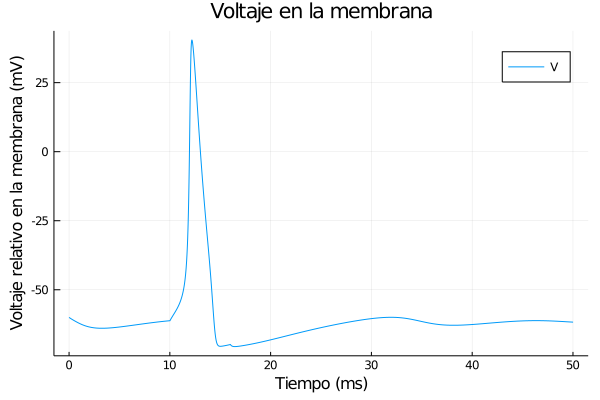

In [9]:
# Graficar el potencial de membrana en función del tiempo
plot(simulacion.T, simulacion.V, title="Voltaje en la membrana", xlabel="Tiempo (ms)", ylabel="Voltaje relativo en la membrana (mV)", label="V")

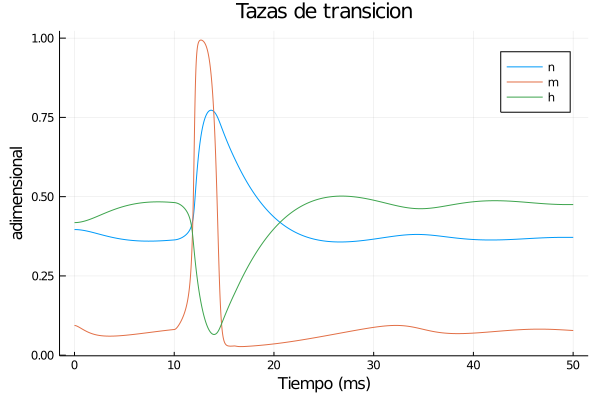

In [10]:
# Graficar las variables de compuerta en función del tiempo (Tazas de trasisicion)
plot(simulacion.T, simulacion.n, xlabel="Tiempo (ms)", ylabel="n", label="n")
plot!(simulacion.T, simulacion.m, xlabel="Tiempo (ms)", ylabel="m", label="m")
plot!(simulacion.T, simulacion.h, xlabel="Tiempo (ms)", ylabel="h", label="h")
title!("Tazas de transicion")
yaxis!("adimensional")

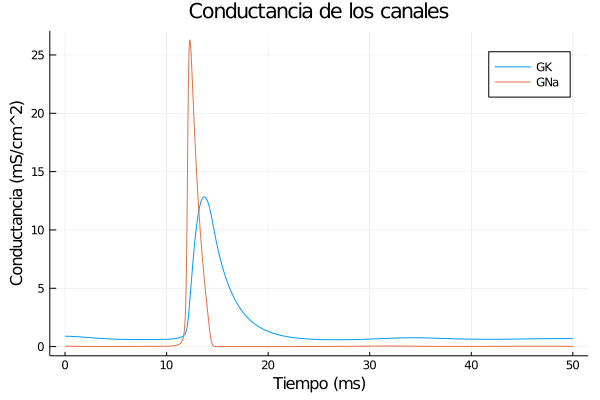

In [11]:
# Graficar las conductancias en función del tiempo
plot(simulacion.T, simulacion.GK, xlabel="Tiempo (ms)", ylabel="Conductancia K (mS/cm^2)", label="GK")
plot!(simulacion.T, simulacion.GNa, xlabel="Tiempo (ms)", ylabel="Conductancia Na (mS/cm^2)", label="GNa")
title!("Conductancia de los canales")
yaxis!("Conductancia (mS/cm^2)")

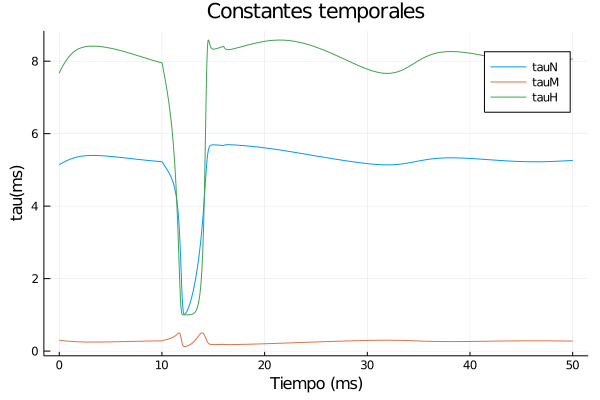

In [12]:
# Graficar las constantes de tiempo en función del tiempo
plot(simulacion.T, simulacion.tauN, xlabel="Tiempo (ms)", ylabel="Tau n (ms)", label="tauN")
plot!(simulacion.T, simulacion.tauM, xlabel="Tiempo (ms)", ylabel="Tau m (ms)", label="tauM")
plot!(simulacion.T, simulacion.tauH, xlabel="Tiempo (ms)", ylabel="Tau h (ms)", label="tauH")
title!("Constantes temporales")
yaxis!("tau(ms)")

# Comentarios y resultados

Luego de ejecutar la simulación con los parámetros proporcionados, obtenemos los siguientes resultados:

1. Potencial de Membrana: El potencial de membrana sigue un comportamiento típico de una neurona excitada, con un rápido cambio inicial hacia un pico positivo seguido de una rápida caída hacia el potencial de reposo. Luego de la estimulación, el potencial de membrana vuelve a su valor de reposo.

2. Variables de Compuerta: Las variables de compuerta (n, m, h) representan la probabilidad de que los canales de potasio (n) y sodio (m, h) estén abiertos. Estas variables fluctúan durante la simulación, pero tienden a estabilizarse después de un tiempo. El valor final de estas variables depende de la duración y la intensidad de la estimulación.

3. Conductancias: Las conductancias de los canales de potasio (GK) y sodio (GNa) muestran cambios correspondientes a la apertura y cierre de los canales durante la simulación. La conductancia de sodio (GNa) alcanza su valor máximo durante el pico de excitación, mientras que la conductancia de potasio (GK) aumenta después del pico y contribuye a la repolarización del potencial de membrana.

4. Constantes de Tiempo: Las constantes de tiempo ($\tau_N$, $\tau_M$, $\tau_H$) indican la velocidad a la que las variables de compuerta alcanzan su valor de estado estable. Estas constantes determinan la velocidad de cambio de las variables de compuerta y juegan un papel importante en la dinámica del modelo.

Estos resultados representan la evolución de las variables del modelo de Hodgkin-Huxley a lo largo del tiempo, utilizando el método de integración de Euler. Cada arreglo contiene los valores correspondientes a cada paso de tiempo definido en el intervalo de simulación. En general, la simulación muestra el comportamiento esperado del modelo de Hodgkin-Huxley, con una respuesta de la membrana neuronal a la estimulación externa. Los resultados pueden variar según los parámetros utilizados, como la duración y la intensidad de la estimulación.

***Nota:***
Ahora se prueba el algoritmo con pulsos de t en 10->30, con corrientes de 10 microamperes.

In [13]:
# Definición de las funciones que describen el modelo de Hodgkin-Huxley
function n_inf(V)
    # Calcula la variable de activación de canales de potasio
    alpha_n = (0.01*(V+55)) / (1 - exp(-0.1*(V+55)))
    beta_n = 0.125 * exp(-0.0125*(V+65))
    return alpha_n / (alpha_n + beta_n)
end

function m_inf(V)
    # Calcula la variable de activación de canales de sodio
    alpha_m = (0.1*(V+40)) / (1 - exp(-0.1*(V+40)))
    beta_m = 4.0 * exp(-0.0556*(V+65))
    return alpha_m / (alpha_m + beta_m)
end

function h_inf(V)
    # Calcula la variable de desactivación de canales de sodio
    alpha_h = 0.07 * exp(-0.05*(V+65))
    beta_h = 1 / (1 + exp(-0.1*(V+35)))
    return alpha_h / (alpha_h + beta_h)
end

function tau_n(V)
    # Calcula la constante de tiempo de la variable de activación de canales de potasio
    alpha_n = (0.01*(V+55)) / (1 - exp(-0.1*(V+55)))
    beta_n = 0.125 * exp(-0.0125*(V+65))
    return 1 / (alpha_n + beta_n)
end

function tau_m(V)
    # Calcula la constante de tiempo de la variable de activación de canales de sodio
    alpha_m = (0.1*(V+40)) / (1 - exp(-0.1*(V+40)))
    beta_m = 4.0 * exp(-0.0556*(V+65))
    return 1 / (alpha_m + beta_m)
end

function tau_h(V)
    # Calcula la constante de tiempo de la variable de desactivación de canales de sodio
    alpha_h = 0.07 * exp(-0.05*(V+65))
    beta_h = 1 / (1 + exp(-0.1*(V+35)))
    return 1 / (alpha_h + beta_h)
end

function makeIext(t0=10.0, tfin=30.0, current=10)
    # Genera una función que representa una corriente externa rectangular en un intervalo de tiempo
    function Iext(t)
        if t > t0 && t < tfin
            return current
        else
            return 0.0
        end
    end
    return Iext
end

# Implementación de la funcion para el modelo de Hodgkin-Huxley
function EulerHodkinHuxley(parametros)

    Δt = parametros["DeltaT"]
    maxT = parametros["maxT"]
    V0 = parametros["V0"]
    gNa = parametros["gNa"]
    gK = parametros["gK"]
    gL = parametros["gL"]
    Cm = parametros["Cm"]
    ENa = parametros["ENa"]
    EK = parametros["EK"]
    EL = parametros["EL"]
    
    # Inicialización de variables
    t = 0.0
    V = V0
    n = n_inf(V)
    m = m_inf(V)
    h = h_inf(V)
    
    # Vectores para almacenar los resultados
    T = [t]
    V_values = [V]
    n_values = [n]
    m_values = [m]
    h_values = [h]
    GK_values = [gK * n^4]
    GNa_values = [gNa * m^3 * h]
    tauN_values = [tau_n(V)]
    tauM_values = [tau_m(V)]
    tauH_values = [tau_h(V)]
    
    while t < maxT
        # Cálculo de corriente externa en el tiempo t
        Iext = makeIext()(t)
        
        # Cálculo de los valores de n, m y h en t+Δt
        n_new = (1 - Δt/tau_n(V)) * n + (Δt/tau_n(V)) * n_inf(V)
        m_new = (1 - Δt/tau_m(V)) * m + (Δt/tau_m(V)) * m_inf(V)
        h_new = (1 - Δt/tau_h(V)) * h + (Δt/tau_h(V)) * h_inf(V)
        
        # Cálculo de V en t+Δt
        GNa = gNa * m^3 * h
        GK = gK * n^4
        VL = gL * (V - EL)
        V_new = V - Δt/Cm * (GNa * (V - ENa) + GK * (V - EK) + VL) + Δt/Cm * Iext
        
        # Actualización de variables y tiempo
        t += Δt
        V = V_new
        n = n_new
        m = m_new
        h = h_new
        
        # Almacenamiento de los valores
        push!(T, t)
        push!(V_values, V)
        push!(n_values, n)
        push!(m_values, m)
        push!(h_values, h)
        push!(GK_values, GK)
        push!(GNa_values, GNa)
        push!(tauN_values, tau_n(V))
        push!(tauM_values, tau_m(V))
        push!(tauH_values, tau_h(V))
    end
    
    return (T=T, V=V_values, n=n_values, m=m_values, h=h_values,
            GK=GK_values, GNa=GNa_values, tauN=tauN_values,
            tauM=tauM_values, tauH=tauH_values)
end

# Parámetros de la simulación
parametros = Dict(
    "DeltaT" => 0.01,
    "maxT" => 50.0,
    "V0" => -60.0,
    "gNa" => 120.0,
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,
    "ENa" => 55.0,
    "EK" => -72.0,
    "EL" => -49.387
)

# Ejecución de la simulación
simulacion = EulerHodkinHuxley(parametros)

(T = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  49.91999999999864, 49.929999999998635, 49.93999999999863, 49.94999999999863, 49.95999999999863, 49.96999999999863, 49.979999999998626, 49.98999999999862, 49.99999999999862, 50.00999999999862], V = [-60.0, -60.027271678423695, -60.05420821136321, -60.08082692461274, -60.10714430010834, -60.13317600707715, -60.15893693271833, -60.18444121234139, -60.20970225889924, -60.23473279186433  …  -62.621752356213086, -62.62465311345767, -62.62752576466403, -62.63037034805818, -62.63318690275084, -62.635975468726464, -62.63873608683228, -62.64146879876744, -62.64417364707215, -62.64685067511687], n = [0.3962682484560505, 0.3962682484560505, 0.3962674030010192, 0.39626572478729655, 0.3962632259238643, 0.39625991796163396, 0.396255811921558, 0.3962509183215933, 0.3962452472025447, 0.39623880815282025  …  0.37375916266936987, 0.3737232627863414, 0.37368734577066276, 0.3736514124775209, 0.37361546375922383, 0.373579500

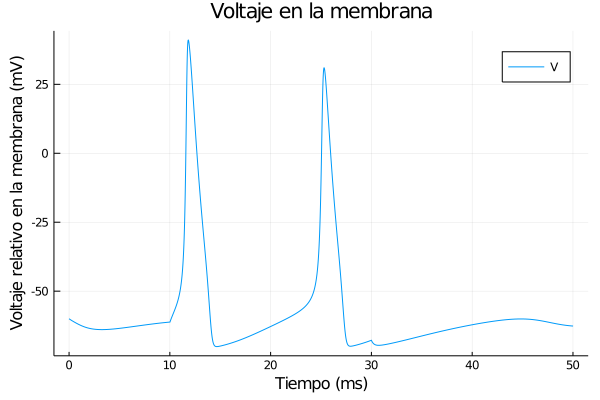

In [14]:
# Graficar el potencial de membrana en función del tiempo
plot(simulacion.T, simulacion.V, title="Voltaje en la membrana", xlabel="Tiempo (ms)", ylabel="Voltaje relativo en la membrana (mV)", label="V")

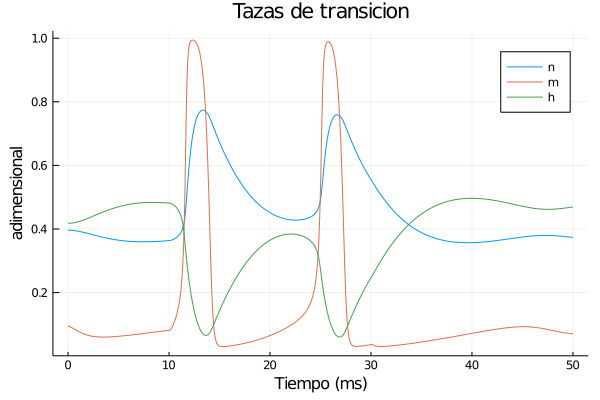

In [15]:
# Graficar las variables de compuerta en función del tiempo (Tazas de trasisicion)
plot(simulacion.T, simulacion.n, xlabel="Tiempo (ms)", ylabel="n", label="n")
plot!(simulacion.T, simulacion.m, xlabel="Tiempo (ms)", ylabel="m", label="m")
plot!(simulacion.T, simulacion.h, xlabel="Tiempo (ms)", ylabel="h", label="h")
title!("Tazas de transicion")
yaxis!("adimensional")

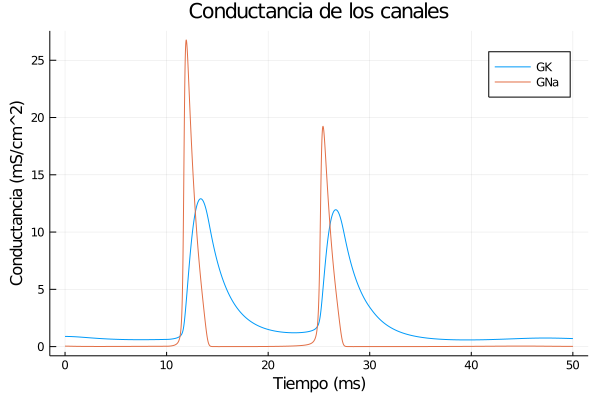

In [16]:
# Graficar las conductancias en función del tiempo
plot(simulacion.T, simulacion.GK, xlabel="Tiempo (ms)", ylabel="Conductancia K (mS/cm^2)", label="GK")
plot!(simulacion.T, simulacion.GNa, xlabel="Tiempo (ms)", ylabel="Conductancia Na (mS/cm^2)", label="GNa")
title!("Conductancia de los canales")
yaxis!("Conductancia (mS/cm^2)")

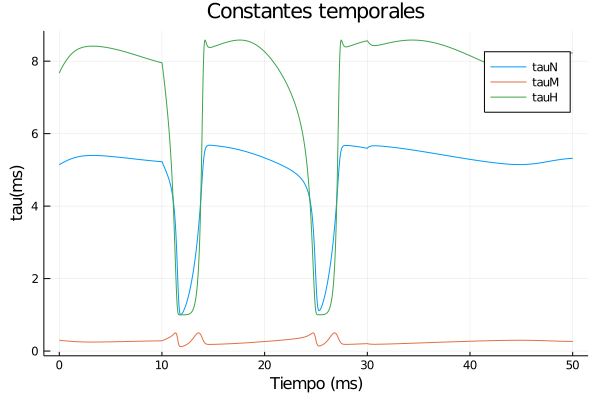

In [17]:
# Graficar las constantes de tiempo en función del tiempo
plot(simulacion.T, simulacion.tauN, xlabel="Tiempo (ms)", ylabel="Tau n (ms)", label="tauN")
plot!(simulacion.T, simulacion.tauM, xlabel="Tiempo (ms)", ylabel="Tau m (ms)", label="tauM")
plot!(simulacion.T, simulacion.tauH, xlabel="Tiempo (ms)", ylabel="Tau h (ms)", label="tauH")
title!("Constantes temporales")
yaxis!("tau(ms)")

***Nota:***
Ahora se prueba el algoritmo con pulsos de t en 10->30, con corrientes de -10 microamperes.

In [18]:
# Definición de las funciones que describen el modelo de Hodgkin-Huxley
function n_inf(V)
    # Calcula la variable de activación de canales de potasio
    alpha_n = (0.01*(V+55)) / (1 - exp(-0.1*(V+55)))
    beta_n = 0.125 * exp(-0.0125*(V+65))
    return alpha_n / (alpha_n + beta_n)
end

function m_inf(V)
    # Calcula la variable de activación de canales de sodio
    alpha_m = (0.1*(V+40)) / (1 - exp(-0.1*(V+40)))
    beta_m = 4.0 * exp(-0.0556*(V+65))
    return alpha_m / (alpha_m + beta_m)
end

function h_inf(V)
    # Calcula la variable de desactivación de canales de sodio
    alpha_h = 0.07 * exp(-0.05*(V+65))
    beta_h = 1 / (1 + exp(-0.1*(V+35)))
    return alpha_h / (alpha_h + beta_h)
end

function tau_n(V)
    # Calcula la constante de tiempo de la variable de activación de canales de potasio
    alpha_n = (0.01*(V+55)) / (1 - exp(-0.1*(V+55)))
    beta_n = 0.125 * exp(-0.0125*(V+65))
    return 1 / (alpha_n + beta_n)
end

function tau_m(V)
    # Calcula la constante de tiempo de la variable de activación de canales de sodio
    alpha_m = (0.1*(V+40)) / (1 - exp(-0.1*(V+40)))
    beta_m = 4.0 * exp(-0.0556*(V+65))
    return 1 / (alpha_m + beta_m)
end

function tau_h(V)
    # Calcula la constante de tiempo de la variable de desactivación de canales de sodio
    alpha_h = 0.07 * exp(-0.05*(V+65))
    beta_h = 1 / (1 + exp(-0.1*(V+35)))
    return 1 / (alpha_h + beta_h)
end

function makeIext(t0=10.0, tfin=30.0, current=-10)
    # Genera una función que representa una corriente externa rectangular en un intervalo de tiempo
    function Iext(t)
        if t > t0 && t < tfin
            return current
        else
            return 0.0
        end
    end
    return Iext
end

# Implementación de la funcion para el modelo de Hodgkin-Huxley
function EulerHodkinHuxley(parametros)

    Δt = parametros["DeltaT"]
    maxT = parametros["maxT"]
    V0 = parametros["V0"]
    gNa = parametros["gNa"]
    gK = parametros["gK"]
    gL = parametros["gL"]
    Cm = parametros["Cm"]
    ENa = parametros["ENa"]
    EK = parametros["EK"]
    EL = parametros["EL"]
    
    # Inicialización de variables
    t = 0.0
    V = V0
    n = n_inf(V)
    m = m_inf(V)
    h = h_inf(V)
    
    # Vectores para almacenar los resultados
    T = [t]
    V_values = [V]
    n_values = [n]
    m_values = [m]
    h_values = [h]
    GK_values = [gK * n^4]
    GNa_values = [gNa * m^3 * h]
    tauN_values = [tau_n(V)]
    tauM_values = [tau_m(V)]
    tauH_values = [tau_h(V)]
    
    while t < maxT
        # Cálculo de corriente externa en el tiempo t
        Iext = makeIext()(t)
        
        # Cálculo de los valores de n, m y h en t+Δt
        n_new = (1 - Δt/tau_n(V)) * n + (Δt/tau_n(V)) * n_inf(V)
        m_new = (1 - Δt/tau_m(V)) * m + (Δt/tau_m(V)) * m_inf(V)
        h_new = (1 - Δt/tau_h(V)) * h + (Δt/tau_h(V)) * h_inf(V)
        
        # Cálculo de V en t+Δt
        GNa = gNa * m^3 * h
        GK = gK * n^4
        VL = gL * (V - EL)
        V_new = V - Δt/Cm * (GNa * (V - ENa) + GK * (V - EK) + VL) + Δt/Cm * Iext
        
        # Actualización de variables y tiempo
        t += Δt
        V = V_new
        n = n_new
        m = m_new
        h = h_new
        
        # Almacenamiento de los valores
        push!(T, t)
        push!(V_values, V)
        push!(n_values, n)
        push!(m_values, m)
        push!(h_values, h)
        push!(GK_values, GK)
        push!(GNa_values, GNa)
        push!(tauN_values, tau_n(V))
        push!(tauM_values, tau_m(V))
        push!(tauH_values, tau_h(V))
    end
    
    return (T=T, V=V_values, n=n_values, m=m_values, h=h_values,
            GK=GK_values, GNa=GNa_values, tauN=tauN_values,
            tauM=tauM_values, tauH=tauH_values)
end

# Parámetros de la simulación
parametros = Dict(
    "DeltaT" => 0.01,
    "maxT" => 50.0,
    "V0" => -60.0,
    "gNa" => 120.0,
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,
    "ENa" => 55.0,
    "EK" => -72.0,
    "EL" => -49.387
)

# Ejecución de la simulación
simulacion = EulerHodkinHuxley(parametros)

(T = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  49.91999999999864, 49.929999999998635, 49.93999999999863, 49.94999999999863, 49.95999999999863, 49.96999999999863, 49.979999999998626, 49.98999999999862, 49.99999999999862, 50.00999999999862], V = [-60.0, -60.027271678423695, -60.05420821136321, -60.08082692461274, -60.10714430010834, -60.13317600707715, -60.15893693271833, -60.18444121234139, -60.20970225889924, -60.23473279186433  …  -62.16826133350237, -62.161130546988815, -62.15400524457093, -62.14688543314894, -62.139771119684106, -62.132662311199304, -62.12555901477951, -62.11846123757233, -62.111368986788534, -62.10428226970259], n = [0.3962682484560505, 0.3962682484560505, 0.3962674030010192, 0.39626572478729655, 0.3962632259238643, 0.39625991796163396, 0.396255811921558, 0.3962509183215933, 0.3962452472025447, 0.39623880815282025  …  0.35751634761895384, 0.35752448162428885, 0.35753281397977554, 0.35754134419154826, 0.357550071766265, 0.3575589

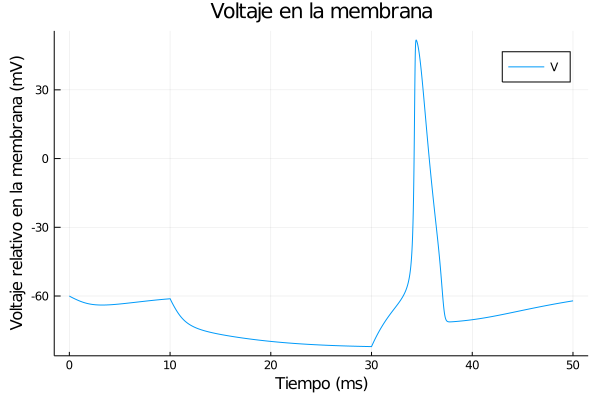

In [19]:
# Graficar el potencial de membrana en función del tiempo
plot(simulacion.T, simulacion.V, title="Voltaje en la membrana", xlabel="Tiempo (ms)", ylabel="Voltaje relativo en la membrana (mV)", label="V")

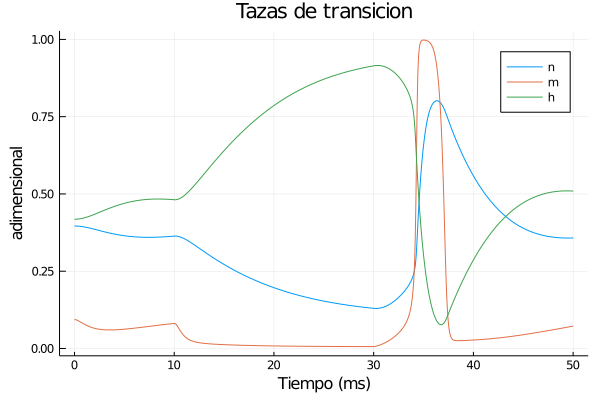

In [20]:
# Graficar las variables de compuerta en función del tiempo (Tazas de trasisicion)
plot(simulacion.T, simulacion.n, xlabel="Tiempo (ms)", ylabel="n", label="n")
plot!(simulacion.T, simulacion.m, xlabel="Tiempo (ms)", ylabel="m", label="m")
plot!(simulacion.T, simulacion.h, xlabel="Tiempo (ms)", ylabel="h", label="h")
title!("Tazas de transicion")
yaxis!("adimensional")

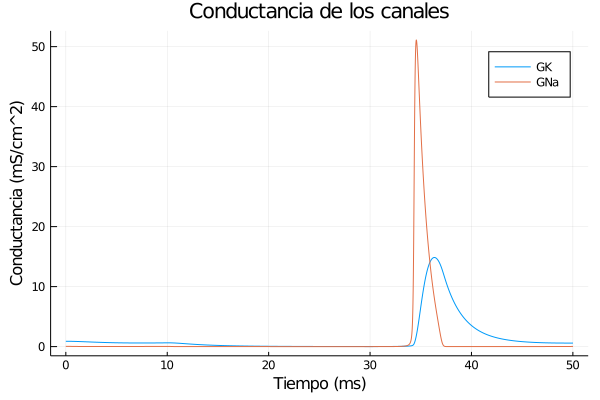

In [21]:
# Graficar las conductancias en función del tiempo
plot(simulacion.T, simulacion.GK, xlabel="Tiempo (ms)", ylabel="Conductancia K (mS/cm^2)", label="GK")
plot!(simulacion.T, simulacion.GNa, xlabel="Tiempo (ms)", ylabel="Conductancia Na (mS/cm^2)", label="GNa")
title!("Conductancia de los canales")
yaxis!("Conductancia (mS/cm^2)")

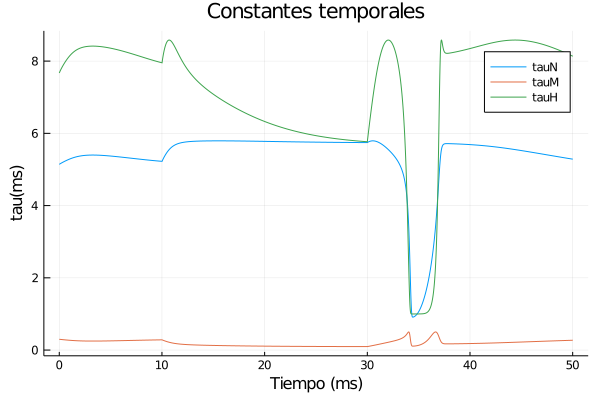

In [23]:
# Graficar las constantes de tiempo en función del tiempo
plot(simulacion.T, simulacion.tauN, xlabel="Tiempo (ms)", ylabel="Tau n (ms)", label="tauN")
plot!(simulacion.T, simulacion.tauM, xlabel="Tiempo (ms)", ylabel="Tau m (ms)", label="tauM")
plot!(simulacion.T, simulacion.tauH, xlabel="Tiempo (ms)", ylabel="Tau h (ms)", label="tauH")
title!("Constantes temporales")
yaxis!("tau(ms)")

# Comentarios y resultados

Durante el intervalo de tiempo en el que se aplica el pulso de corriente positiva de 10 microamperes, se observa un aumento en el potencial de membrana (V) y una mayor activación de los canales de sodio (m) en comparación con el caso sin corriente externa.

Durante el intervalo de tiempo en el que se aplica el pulso de corriente negativa de -10 microamperes, se observa una disminución en el potencial de membrana (V) y una mayor activación de los canales de potasio (n) en comparación con el caso sin corriente externa.

Estas variaciones en las variables de activación de los canales de sodio y potasio afectan las conductancias correspondientes (GNa y GK) y las constantes de tiempo ($\tau_N$ y $\tau_M$).